# TF Simple MLP

\- [Saurabh Mathur](https://saurabhmathur96.github.io/)

The aim of this experiment is to build a Multilayered Perceptron with 2 hidden layers to recognize handwritten digits.

In [19]:
import tensorflow as tf
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [20]:
mnist = fetch_mldata("MNIST original", data_home="/home/saurabh/Documents/python/digits/data")

X_train, X_test, y_train, y_test = train_test_split(mnist.data, label_binarize(mnist.target, classes = range(10)))

In [21]:
print ('Shape of X : {}'.format(X_train[0].shape))
print ('Shape of y : {}'.format(y_train[0].shape))

Shape of X : (784,)
Shape of y : (10,)


## Build Network of 2 hidden layers

In [28]:
n_hidden1 = 256
n_hidden2 = 128
n_input = 784
n_classes = 10

X = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

def multilayer_perceptron(X, weights, biases):
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(X, weights["h1"]), biases["b1"]))
    layer2 = tf.nn.sigmoid(tf.add(tf.matmul(layer1, weights["h2"]), biases["b2"]))
    return tf.nn.sigmoid(tf.add(tf.matmul(layer2, weights["out"]), biases["out"]))

stddev = 0.1

weights = {
    "h1": tf.Variable(tf.random_normal([n_input, n_hidden1], stddev=stddev)),
    "h2": tf.Variable(tf.random_normal([n_hidden1, n_hidden2], stddev=stddev)),
    "out": tf.Variable(tf.random_normal([n_hidden2, n_classes], stddev=stddev))
}

biases = {
    "b1": tf.Variable(tf.random_normal([n_hidden1])),
    "b2": tf.Variable(tf.random_normal([n_hidden2])),
    "out": tf.Variable(tf.random_normal([n_classes]))
}

## Build model

In [29]:
learning_rate = 0.001

prediction = multilayer_perceptron(X, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(prediction, y))
train_step = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [30]:
n_epochs = 10
batch_size = 100
n_batches = int(X_train.shape[0] / batch_size)

np.random.seed(1)

init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        avg_cost = 0.0
        for _ in range(n_batches):
            indices = np.random.randint(X_train.shape[0], size=batch_size)
            sess.run(train_step, { X: X_train[indices], y: y_train[indices]})
            avg_cost += sess.run(cost, { X: X_train[indices], y: y_train[indices]}) / float(n_batches)
    
        indices = np.random.randint(X_train.shape[0], size=batch_size)
        score = sess.run(accuracy, { X: X_train[indices], y: y_train[indices]})
        print ("Epoch {0}/{1}. Cost {2:0.2f}. Accuracy {3:0.1f} %.".format(epoch + 1, n_epochs, avg_cost, 100 * score))
    score = sess.run(accuracy, { X: X_test, y: y_test})
    print ("Testing Accuracy {0:0.1f} %.".format(100 * score))

Epoch 1/10. Cost 1.73. Accuracy 90.0 %.
Epoch 2/10. Cost 1.57. Accuracy 90.0 %.
Epoch 3/10. Cost 1.55. Accuracy 93.0 %.
Epoch 4/10. Cost 1.53. Accuracy 92.0 %.
Epoch 5/10. Cost 1.53. Accuracy 95.0 %.
Epoch 6/10. Cost 1.52. Accuracy 88.0 %.
Epoch 7/10. Cost 1.52. Accuracy 92.0 %.
Epoch 8/10. Cost 1.52. Accuracy 92.0 %.
Epoch 9/10. Cost 1.51. Accuracy 95.0 %.
Epoch 10/10. Cost 1.51. Accuracy 91.0 %.
Testing Accuracy 93.5 %.


(0, 100)

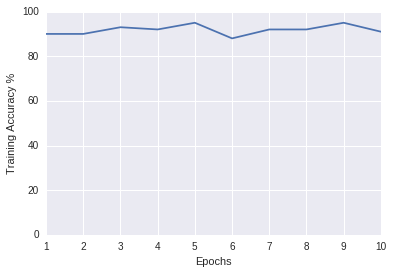

In [31]:
points = {
    "x": range(1, 11),
    "y": [90.0, 90.0, 93.0, 92.0, 95.0, 88.0, 92.0, 92.0, 95.0, 91.0]
}
plt.plot(points["x"], points["y"])
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy %")
plt.ylim((0, 100))

(0, 2)

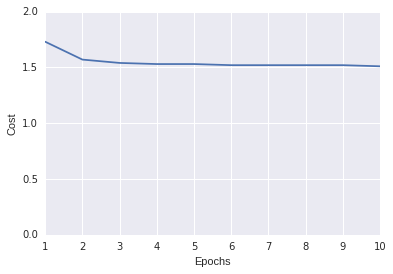

In [37]:
points = {
    "x": range(1, 11),
    "y": [1.73, 1.57, 1.55, 1.53, 1.53, 1.52, 1.52, 1.52, 1.51, 1.51]
}

plt.plot(points["x"], points["y"])
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.ylim((0, 2))